Mounted at /drive
One-way ANOVA Result:

                df        sum_sq       mean_sq          F        PR(>F)
C(AUSPICE)     2.0  9.611211e+04  48056.057145  21.843051  5.057716e-10
Residual    1060.0  2.332065e+06   2200.061571        NaN           NaN


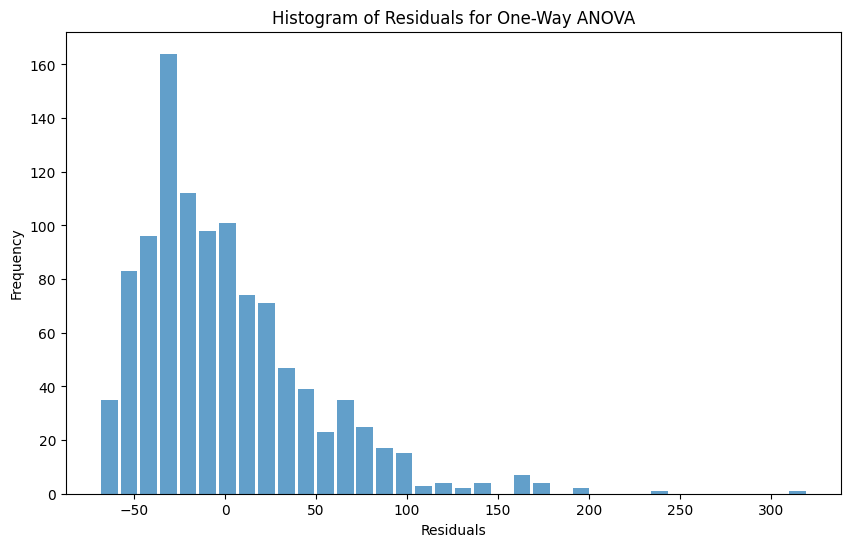

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 24, but rank is 18
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 48, but rank is 42
  warnings.warn('covariance of constraints does not have full '



Two-way ANOVA Result:

                          sum_sq     df          F        PR(>F)
C(AUSPICE)          9.914924e+04    2.0  22.623942  2.463860e-10
C(ward)             9.083235e+04   24.0   1.727182  2.989186e-02
C(AUSPICE):C(ward)  8.288887e+04   48.0   0.788068  8.317984e-01
Residual            2.178098e+06  994.0        NaN           NaN


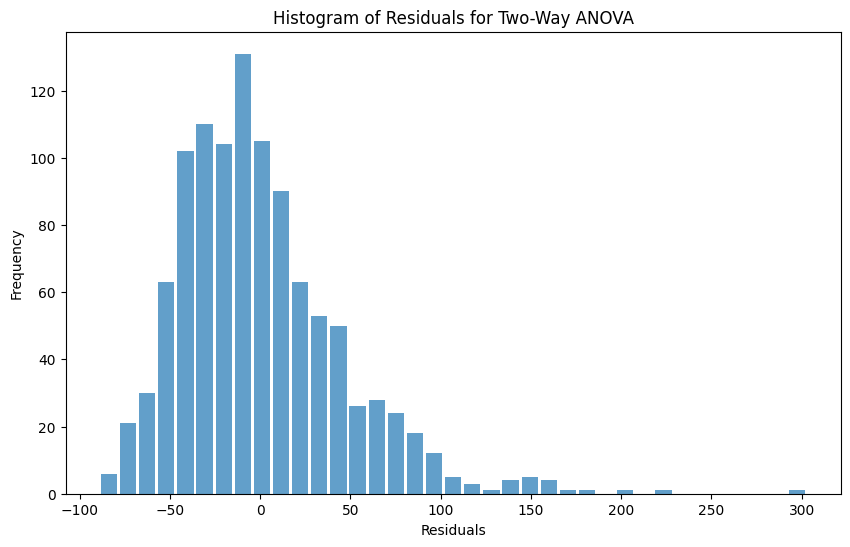

Normality results by auspice group:
AUSPICE
Commercial Agency                1.013541e-11
Non Profit Agency                8.339871e-22
Public (City Operated) Agency    9.225869e-02
Name: TOTSPACE, dtype: float64



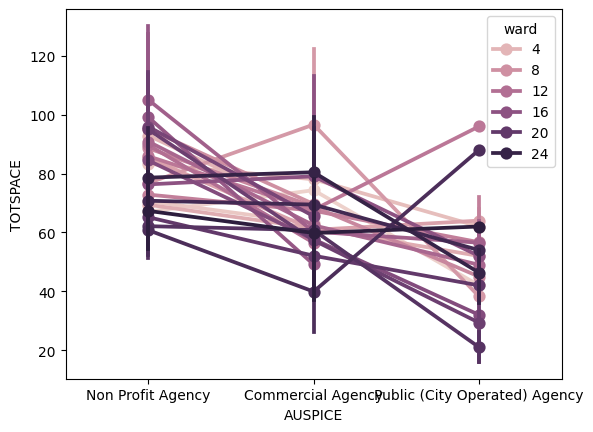


Post-hoc Test (Tukey's HSD):

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
from google.colab import drive
drive.mount("/drive", force_remount=True)
df = pd.read_excel("/drive/MyDrive/INF2178_A2_data.xlsx")

# Analyze the effect of 'AUSPICE' on 'TOTSPACE' and how 'ward' may interact with 'AUSPICE' in affecting 'TOTSPACE'
# One-way ANOVA with 'AUSPICE' on 'TOTSPACE'
model_one_way = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
one_way_anova_result = sm.stats.anova_lm(model_one_way, typ=1)
print("One-way ANOVA Result:\n")
print(one_way_anova_result)

# Histogram for residuals of one-way ANOVA
plt.figure(figsize=(10, 6))
plt.hist(model_one_way.resid, bins='auto', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Residuals for One-Way ANOVA')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Two-way ANOVA with 'AUSPICE' and 'ward' on 'TOTSPACE'
model_two_way = ols('TOTSPACE ~ C(AUSPICE) + C(ward) + C(AUSPICE):C(ward)', data=df).fit()
two_way_anova_result = sm.stats.anova_lm(model_two_way, typ=2)
print("\nTwo-way ANOVA Result:\n")
print(two_way_anova_result)

# Histogram for residuals of two-way ANOVA
plt.figure(figsize=(10, 6))
plt.hist(model_two_way.resid, bins='auto', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Residuals for Two-Way ANOVA')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk test for normality within each auspice group
normality_results = df.groupby('AUSPICE')['TOTSPACE'].apply(lambda x: stats.shapiro(x)[1])
print("Normality results by auspice group:")
print(normality_results)
print()


# Interaction plot
sns.pointplot(x='AUSPICE', y='TOTSPACE', hue='ward', data=df)
plt.show()

# Post-hoc tests if ANOVA shows significant results
comp = mc.MultiComparison(df['TOTSPACE'], df['AUSPICE'])
post_hoc_res = comp.tukeyhsd()
print("\nPost-hoc Test (Tukey's HSD):\n")
print(post_hoc_res)
